In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Microsoft_Stock.csv", parse_dates=['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [5]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

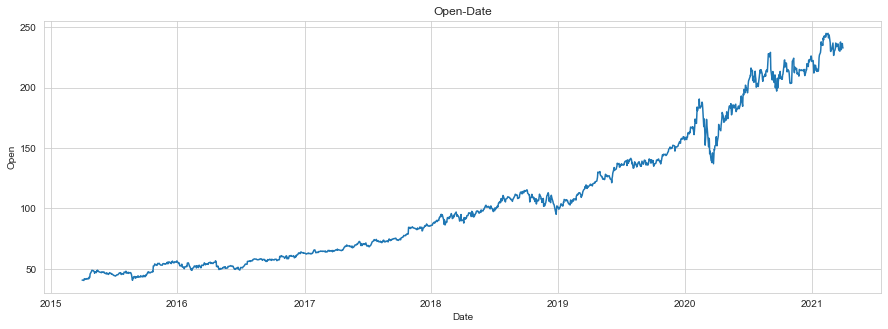

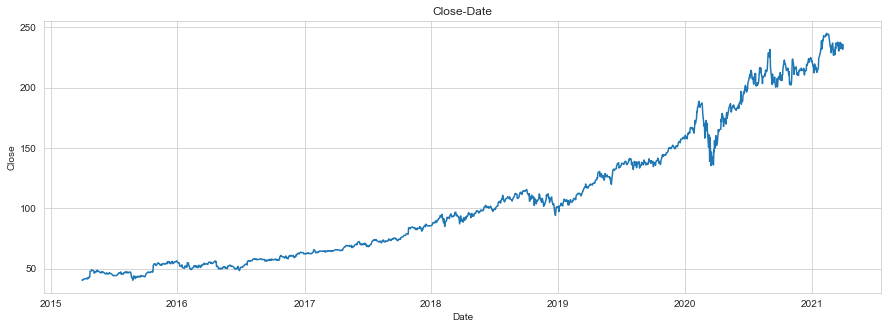

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Open',data=data, palette='green')
plt.title('Open-Date', fontsize=12)

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=data, palette='black')
plt.title('Close-Date', fontsize=12)

plt.show() # Trendline

In [7]:
data2 = data.drop(['Volume','High', 'Low','Date'], axis=1)

In [8]:
data3 = data.drop(['Volume','Open', 'Close','Date'], axis=1)

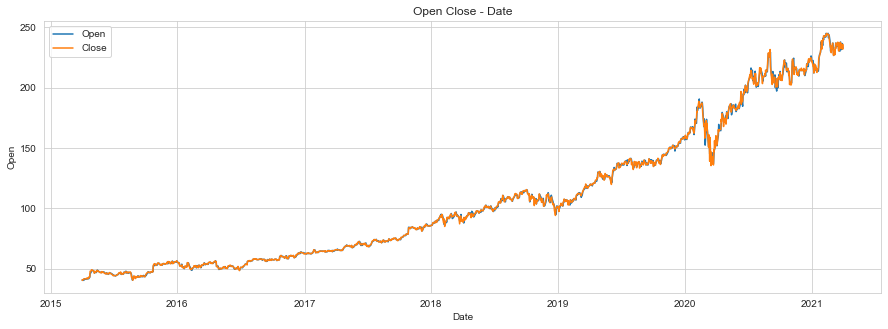

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Open',data=data, palette='black')
sns.lineplot(x='Date',y='Close',data=data, palette='red')
plt.title('Open Close - Date', fontsize=12)

plt.legend(data2)
plt.show()

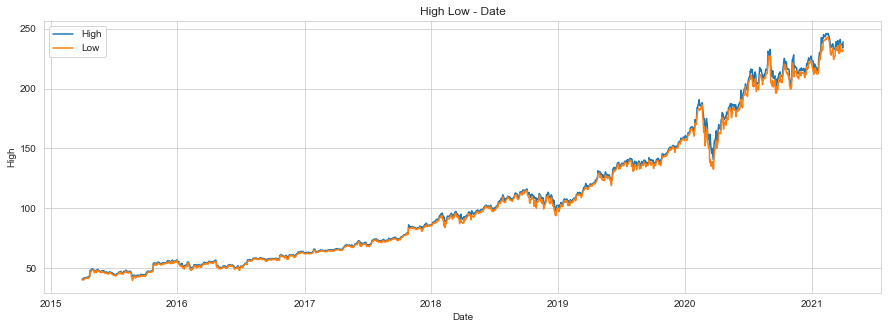

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='High',data=data, palette='black')
sns.lineplot(x='Date',y='Low',data=data, palette='red')
plt.title('High Low - Date', fontsize=12)

plt.legend(data3)
plt.show() 

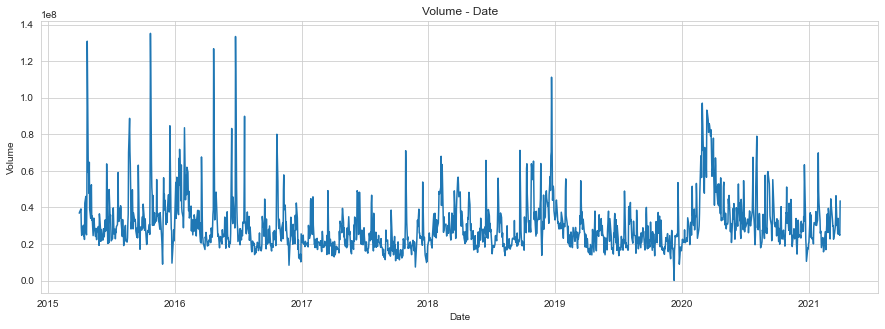

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Volume',data=data, palette='black')

plt.title('Volume - Date', fontsize=12)

plt.show() 

## Machine Learning Model

In [12]:
data['Year'] = data['Date'].dt.year

### Outlier Values

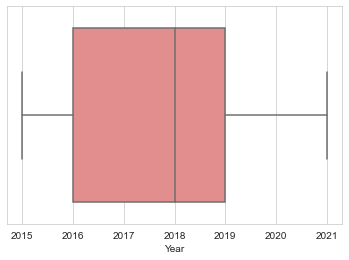

In [13]:
year1 = data['Year']
sns.boxplot(x=year1, color='lightcoral')
plt.show()

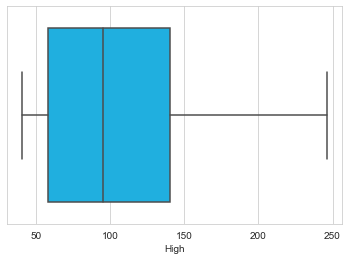

In [14]:
high = data['High']
sns.boxplot(x=high, color='deepskyblue')
plt.show()

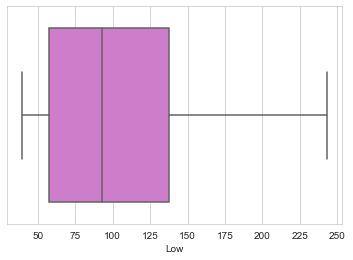

In [15]:
low = data['Low']
sns.boxplot(x=low, color='orchid')
plt.show()

In [16]:
selected_data = data.drop(['Open', 'Close','Volume','Date'],axis=1)
selected_data

,High,Low,Year
0,40.76,40.31,2015
1,40.74,40.12,2015
2,41.78,40.18,2015
3,41.91,41.31,2015
4,41.69,41.04,2015
...,...,...,...
1506,236.94,231.57,2021
1507,236.71,231.55,2021
1508,236.80,231.88,2021
1509,233.85,231.10,2021


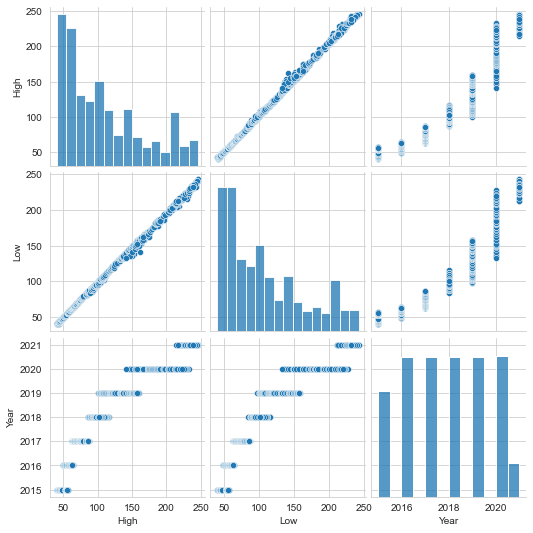

In [17]:
sns.pairplot(selected_data)
plt.show()

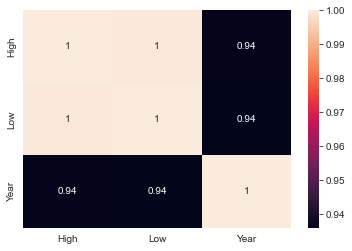

In [18]:
sns.heatmap(selected_data.corr(), annot=True)
plt.show()

In [19]:
X = selected_data.drop(['Low'],axis=1)

In [20]:
y = selected_data['Low']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

In [23]:
model = LinearRegression().fit(X_train, y_train)

In [24]:
model_confidence = model.score(X_test, y_test)

### Accuracy Rate

In [25]:
print(model_confidence)

0.9989061772913366


In [26]:
y_pred = model.predict(X_test)
pred_data = pd.DataFrame(y_pred)
pred_data.columns = ['Prediction']
pred_data = pred_data.sort_values(by='Prediction')

In [27]:
pred_test = pd.DataFrame(y_test)
pred_test.columns = ['Prediction']
pred_test = pred_test.sort_values(by='Prediction')

In [28]:
X_ax = range(len(y_test))

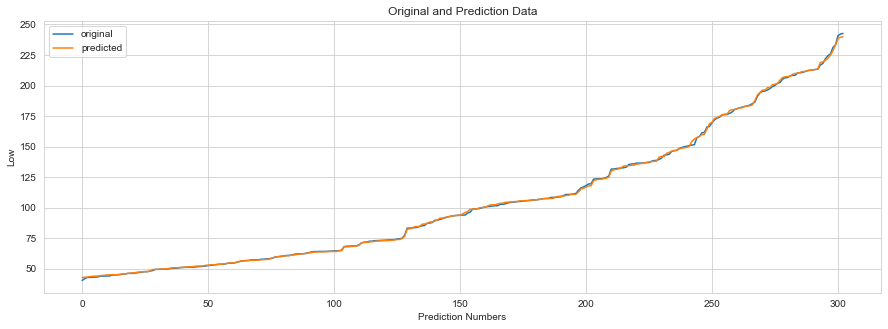

In [29]:
plt.figure(figsize=(15,5))
plt.plot(X_ax, pred_test, label = "original")
plt.plot(X_ax, pred_data, label = "predicted")
plt.title("Original and Prediction Data")
plt.xlabel("Prediction Numbers")
plt.ylabel("Low")
plt.legend()
plt.show()